In [130]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [131]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

REGISTER DATA FOR TRAINING AND MAKE IMAGFE TO DATA SET

In [132]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 679 files belonging to 8 classes.


In [133]:
data_iterator = data.as_numpy_iterator()
#Get another batch from the iterator
batch = data_iterator.next()

TRAIN, VALIDITY, AND TEST SEGMENTATION

In [135]:
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = len(data) - train_size - val_size

In [136]:
train = data.take(train_size)
test = data.skip(train_size)
val = test.skip(test_size).take(val_size)
test = test.take(test_size)

TRAIN MODEL

In [137]:
model = Sequential()

In [138]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [139]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [140]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [141]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


PLOTS FOR LOSS AND ACCURACY

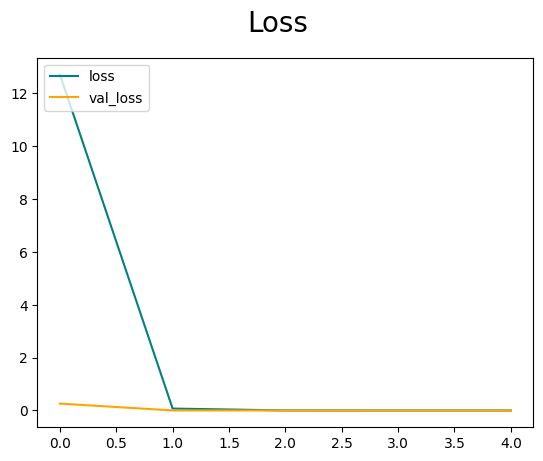

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

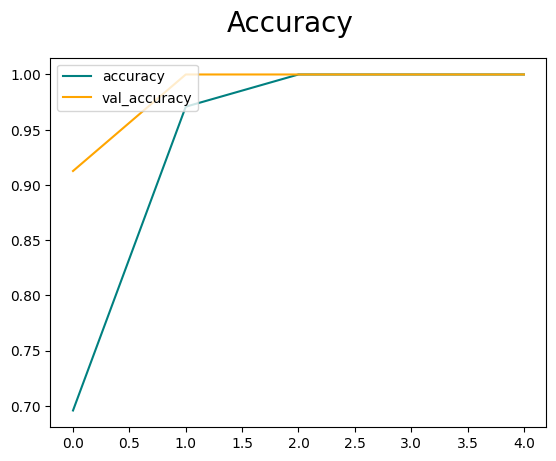

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

TESTING OF TRAINED MODEL

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    yhat_classes = np.argmax(yhat, axis=1)  # Convert predicted probabilities to class indices
    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)
    acc.update_state(y, yhat_classes)

1/1 [==============================] - 0s 79ms/step


In [ ]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 0.25


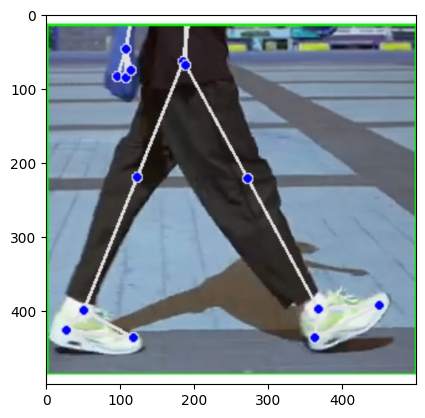

In [ ]:
img = cv2.imread('../test1.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = cv2.resize(img, (256, 256))
normalized_img = resize / 255.0

In [ ]:
yhat_single = model.predict(np.expand_dims(normalized_img, axis=0))
predicted_class = int(np.argmax(yhat_single, axis=1))  # Convert the predicted class to int

1/1 [==============================] - 0s 29ms/step
Phase 1


C:\Users\User\AppData\Local\Temp\ipykernel_4788\1618767841.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(np.argmax(yhat_single, axis=1))  # Convert the predicted class to int


CREATE H5 MODEL IN CNN DIRECTORY

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('CNN','GaitPhaseClassifier.h5'))

USING THE H5 MODEL

In [ ]:
new_model = load_model('CNN/GaitPhaseClassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(normalized_img, axis=0))
predicted_class = int(np.argmax(yhat_single, axis=1))

1/1 [==============================] - 0s 107ms/step


C:\Users\User\AppData\Local\Temp\ipykernel_4788\2621718982.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(np.argmax(yhat_single, axis=1))


In [ ]:
if predicted_class == 0:
    print("Phase 1")
elif predicted_class == 1:
    print("Phase 2")
elif predicted_class == 2:
    print("Phase 3")
elif predicted_class == 3:
    print("Phase 4")
elif predicted_class == 4:
    print("Phase 5")
elif predicted_class == 5:
    print("Phase 6")
elif predicted_class == 6:
    print("Phase 7")
elif predicted_class == 7:
    print("Phase 8")

Phase 1
